In [3]:
from analyze import analyze_data
from utils import RequestData
import json
from datetime import datetime
from zoneinfo import ZoneInfo
import re
run_log_dirs = [
    "/mnt/network_drive/lrq/logs/logs_2025-09-13-12-59-56/run_0",
    "/mnt/network_drive/lrq/logs/logs_2025-09-13-12-59-56/run_1",
    "/mnt/network_drive/lrq/logs/logs_2025-09-13-12-59-56/run_2",
]
tps_counter = "router:tps_counter"
# run_log_dir = "/mnt/network_drive/lrq/logs/logs_2025-09-01-11-05-11/run_0"
# throughput_metric = f"vllm:avg_generation_throughput_toks_per_s"
reports = []
for run_log_dir in run_log_dirs:
    tps_counter_metric = f"router:tps_counter"
    metrics_list = [tps_counter]
    report_file_path = analyze_data(run_log_dir, metrics_list)
    with open(report_file_path, 'r') as f:
        report = json.load(f)

    loadgen_data = report['loadgen_data']
    total_request_count = len(loadgen_data)
    no_response_count = 0
    error_count = 0
    skip_prefill_requests = []
    requests = []
    for request_data in loadgen_data:
        if 'error' not in request_data.keys():
            request = RequestData.init_from_dict(request_data)
            requests.append(request)
            if request.waiting_latency == 0:
                skip_prefill_requests.append(request)
            continue

        if request_data == {'error': 'No response!'}:
            no_response_count += 1
        else:
            error_count += 1
            print(request_data)


    start_str = report.get('router_start_time', 'N/A')
    end_str = report.get('router_end_time', 'N/A')
    tz_sg = ZoneInfo("Asia/Singapore")
    router_start_time = datetime.fromisoformat(start_str).replace(tzinfo=tz_sg).timestamp()
    router_end_time = datetime.fromisoformat(end_str).replace(tzinfo=tz_sg).timestamp()
    pattern = re.compile(r"^(\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}) Finished preparing http requests")
    with open(f"{run_log_dir}/loadgen.err") as f:
        for line in f:
            m = pattern.match(line)
            if m:
                dt = datetime.strptime(m.group(1), "%Y/%m/%d %H:%M:%S").replace(tzinfo=tz_sg)
                break

    first_request_sendtime = dt.timestamp() + 5
    print(f"Router start time: {router_start_time}, end time: {router_end_time}")
    reports.append(report.copy())

Starting Prometheus...


ts=2025-09-13T05:34:28.701Z caller=main.go:573 level=info msg="No time or size retention was set so using the default time retention" duration=15d
ts=2025-09-13T05:34:28.701Z caller=main.go:617 level=info msg="Starting Prometheus Server" mode=server version="(version=2.52.0, branch=HEAD, revision=879d80922a227c37df502e7315fad8ceb10a986d)"
ts=2025-09-13T05:34:28.701Z caller=main.go:622 level=info build_context="(go=go1.22.3, platform=linux/amd64, user=root@1b4f4c206e41, date=20240508-21:56:43, tags=netgo,builtinassets,stringlabels)"
ts=2025-09-13T05:34:28.701Z caller=main.go:623 level=info host_details="(Linux 5.4.0-216-generic #236-Ubuntu SMP Fri Apr 11 19:53:21 UTC 2025 x86_64 cb466f4136ce (none))"
ts=2025-09-13T05:34:28.701Z caller=main.go:624 level=info fd_limits="(soft=1048576, hard=1048576)"
ts=2025-09-13T05:34:28.701Z caller=main.go:625 level=info vm_limits="(soft=unlimited, hard=unlimited)"
ts=2025-09-13T05:34:28.708Z caller=web.go:568 level=info component=web msg="Start listeni

Running Python app...
query_metrics_list: ['router:tps_counter']
params_list: [{'query': 'router:tps_counter', 'start': '2025-09-13T05:03:06Z', 'end': '2025-09-13T07:03:06Z', 'step': '1s'}]
Router start time: 1757739630.11954, end time: 1757739975.75987
Starting Prometheus...


ts=2025-09-13T05:34:41.456Z caller=main.go:573 level=info msg="No time or size retention was set so using the default time retention" duration=15d
ts=2025-09-13T05:34:41.456Z caller=main.go:617 level=info msg="Starting Prometheus Server" mode=server version="(version=2.52.0, branch=HEAD, revision=879d80922a227c37df502e7315fad8ceb10a986d)"
ts=2025-09-13T05:34:41.456Z caller=main.go:622 level=info build_context="(go=go1.22.3, platform=linux/amd64, user=root@1b4f4c206e41, date=20240508-21:56:43, tags=netgo,builtinassets,stringlabels)"
ts=2025-09-13T05:34:41.456Z caller=main.go:623 level=info host_details="(Linux 5.4.0-216-generic #236-Ubuntu SMP Fri Apr 11 19:53:21 UTC 2025 x86_64 f1c6177e64ca (none))"
ts=2025-09-13T05:34:41.456Z caller=main.go:624 level=info fd_limits="(soft=1048576, hard=1048576)"
ts=2025-09-13T05:34:41.456Z caller=main.go:625 level=info vm_limits="(soft=unlimited, hard=unlimited)"
ts=2025-09-13T05:34:41.463Z caller=web.go:568 level=info component=web msg="Start listeni

Running Python app...
query_metrics_list: ['router:tps_counter']
params_list: [{'query': 'router:tps_counter', 'start': '2025-09-13T05:03:05Z', 'end': '2025-09-13T07:03:05Z', 'step': '1s'}]
Router start time: 1757739629.704052, end time: 1757739979.938035
Starting Prometheus...


ts=2025-09-13T05:34:54.805Z caller=main.go:573 level=info msg="No time or size retention was set so using the default time retention" duration=15d
ts=2025-09-13T05:34:54.805Z caller=main.go:617 level=info msg="Starting Prometheus Server" mode=server version="(version=2.52.0, branch=HEAD, revision=879d80922a227c37df502e7315fad8ceb10a986d)"
ts=2025-09-13T05:34:54.805Z caller=main.go:622 level=info build_context="(go=go1.22.3, platform=linux/amd64, user=root@1b4f4c206e41, date=20240508-21:56:43, tags=netgo,builtinassets,stringlabels)"
ts=2025-09-13T05:34:54.805Z caller=main.go:623 level=info host_details="(Linux 5.4.0-216-generic #236-Ubuntu SMP Fri Apr 11 19:53:21 UTC 2025 x86_64 e24b860313c2 (none))"
ts=2025-09-13T05:34:54.805Z caller=main.go:624 level=info fd_limits="(soft=1048576, hard=1048576)"
ts=2025-09-13T05:34:54.806Z caller=main.go:625 level=info vm_limits="(soft=unlimited, hard=unlimited)"
ts=2025-09-13T05:34:54.812Z caller=web.go:568 level=info component=web msg="Start listeni

Running Python app...
query_metrics_list: ['router:tps_counter']
params_list: [{'query': 'router:tps_counter', 'start': '2025-09-13T05:03:06Z', 'end': '2025-09-13T07:03:06Z', 'step': '1s'}]
Router start time: 1757739629.766627, end time: 1757739978.989872


Run0, Model meta-llama/Llama-3.1-8B::decode, first timestamp offset  155.88046002388
Run0, Model meta-llama/Llama-3.1-8B::prefill, first timestamp offset  155.88046002388
Run1, Model meta-llama/Llama-3.1-8B::decode, first timestamp offset  155.88046002388
Run1, Model meta-llama/Llama-3.1-8B::prefill, first timestamp offset  155.88046002388
Run2, Model meta-llama/Llama-3.1-8B::decode, first timestamp offset  155.88046002388
Run2, Model meta-llama/Llama-3.1-8B::prefill, first timestamp offset  155.88046002388


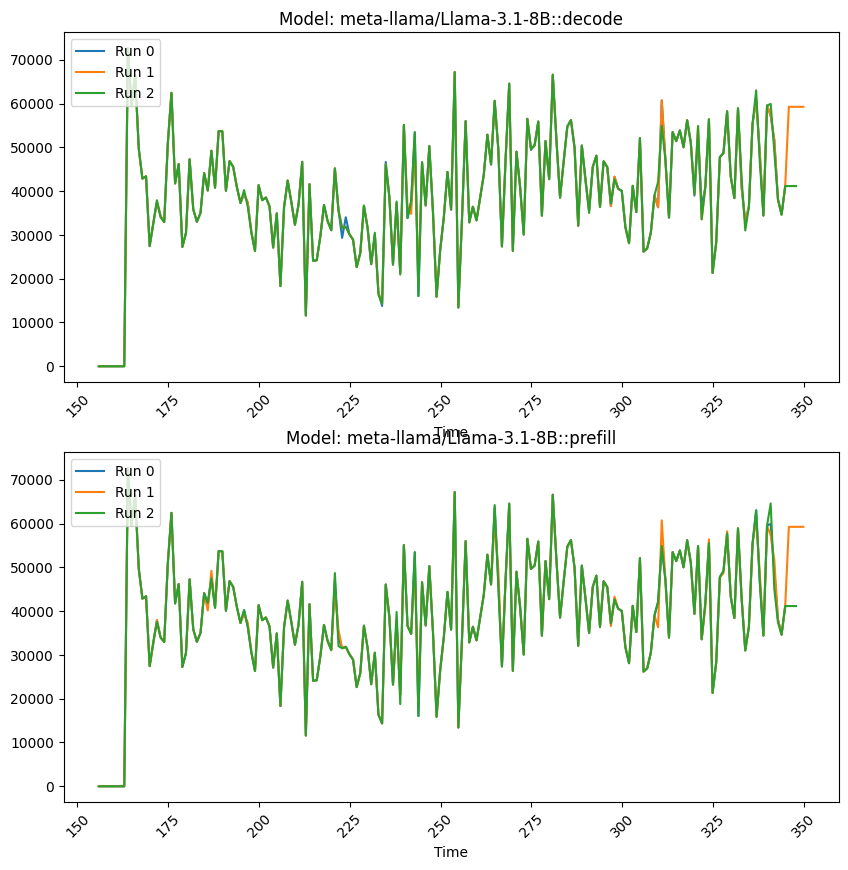

In [4]:

import matplotlib.pyplot as plt
num_models = 2
fig, axes = plt.subplots(num_models, 1, figsize=(10, 5 * num_models))
metric_name = tps_counter_metric
first_run_first_timestamp = None
for j, report in enumerate(reports):
    start_str = report.get('router_start_time', 'N/A')
    end_str = report.get('router_end_time', 'N/A')
    tz_sg = ZoneInfo("Asia/Singapore")
    router_start_time = datetime.fromisoformat(start_str).replace(tzinfo=tz_sg).timestamp()
    router_end_time = datetime.fromisoformat(end_str).replace(tzinfo=tz_sg).timestamp()
    prom_data = report['prom_data']
    router_metrics = prom_data.get("router", {})
    for i, (model_name, metrics) in enumerate(router_metrics.items()):
        ax = axes[i] if num_models > 1 else axes
        tok_counter_values = metrics.get(metric_name, [])
        tok_counter_values = [
            t for t in tok_counter_values 
            if float(t[0]) <= router_end_time
        ]
        timestamps = [float(t[0]) for t in tok_counter_values]
        timestamp_offsets = [t - router_start_time for t in timestamps]
        if j == 0:
            first_run_first_timestamp = timestamp_offsets[0]
        else:
            offset = timestamp_offsets[0] - first_run_first_timestamp
            timestamp_offsets = [t - offset for t in timestamp_offsets]
        ax.plot(
            timestamp_offsets,
            [float(t[1]) for t in tok_counter_values],
            label=f"Run {j}"
        )
        print(f"Run{j}, Model {model_name}, first timestamp offset  {timestamp_offsets[0]}")
        ax.set_title(f"Model: {model_name}")
        ax.set_xlabel("Time")
        ax.tick_params(axis='x', rotation=45)
        ax.legend(loc='upper left')

[0.0, 0.12119197845458984, 0.12441802024841309, 0.15189909934997559, 0.20334815979003906, 0.20377516746520996, 0.20536208152770996, 0.2076280117034912, 0.20765399932861328, 0.2733941078186035, 0.36736011505126953, 0.37950897216796875, 0.38005900382995605, 0.466839075088501, 0.4697999954223633, 0.4700191020965576, 0.4961719512939453, 0.6267509460449219, 0.6283259391784668, 0.6301441192626953, 0.6516590118408203, 0.6641330718994141, 0.6885459423065186, 0.7256801128387451, 0.749528169631958, 0.8660199642181396, 0.8665001392364502, 0.875291109085083, 0.8760640621185303, 0.8870260715484619, 0.9035711288452148, 0.9063451290130615, 0.964698076248169, 1.1254761219024658, 1.2031450271606445, 1.2057240009307861, 1.206247091293335, 1.206305980682373, 1.2084310054779053, 1.245527982711792, 1.247426986694336, 1.3606531620025635, 1.3742260932922363, 1.402642011642456, 1.4053590297698975, 1.405668020248413, 1.4063949584960938, 1.4574041366577148, 1.485672950744629, 1.4859941005706787, 1.4885859489440

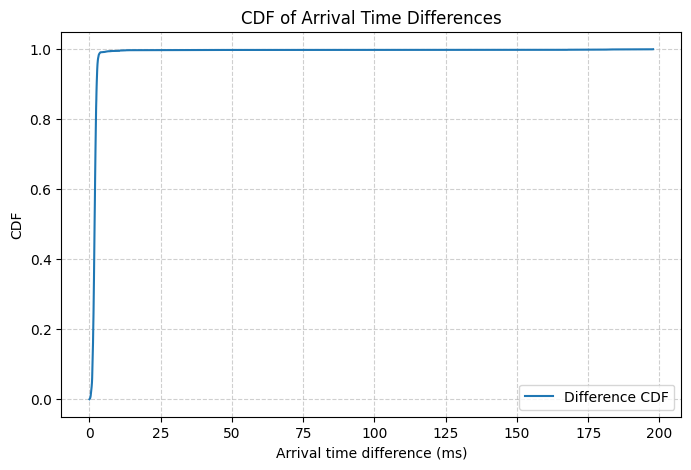

In [5]:
import re
from datetime import datetime
from zoneinfo import ZoneInfo
import numpy as np

def extract_arrival_timestamps(filepath):
    """
    Reads a log file, extracts timestamps from lines like:
    2025/09/12 17:11:44.220959 tokenpipe_route.go:102: [Info] [Tokenpip Route] req: meta-llama/Llama-3.1-8B-0 arrived!

    Only matches lines containing 'arrived!'.
    Converts timestamps into float seconds since epoch (Singapore timezone).
    Returns a list of floats.
    """
    # Regex: timestamp at start + anything + 'arrived!' at the end
    pattern = re.compile(r"^(\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}\.\d+).*arrived!$")
    sg_tz = ZoneInfo("Asia/Singapore")
    timestamps = []

    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            match = pattern.match(line.strip())
            if match:
                ts_str = match.group(1)
                dt = datetime.strptime(ts_str, "%Y/%m/%d %H:%M:%S.%f")
                dt = dt.replace(tzinfo=sg_tz)
                timestamps.append(dt.timestamp())

    return timestamps

arrival_timestamps_list = []
first_request_arrival_times = []
for j, run_log_dir in enumerate(run_log_dirs):
    arrival_timestamps = extract_arrival_timestamps(f"{run_log_dir}/router.err")
    first_request_timestamp = min(arrival_timestamps)
    first_request_arrival_times.append(first_request_timestamp)
    arrival_timestamps = [t - first_request_timestamp for t in arrival_timestamps]
    print(arrival_timestamps)
    arrival_timestamps_list.append(arrival_timestamps)

compare_targets = [0, 2]
t1 = arrival_timestamps_list[compare_targets[0]]
t2 = arrival_timestamps_list[compare_targets[1]]

# align to shorter length
min_len = min(len(t1), len(t2))
t1 = np.array(t1[:min_len])
t2 = np.array(t2[:min_len])

# compute differences in ms
diffs_ms = np.abs(t1 - t2) * 1000.0

# sort for CDF
diffs_sorted = np.sort(diffs_ms)
cdf = np.linspace(0, 1, len(diffs_sorted), endpoint=False)

# plot CDF
plt.figure(figsize=(8, 5))
plt.plot(diffs_sorted, cdf, label="Difference CDF")
plt.xlabel("Arrival time difference (ms)")
plt.ylabel("CDF")
plt.title("CDF of Arrival Time Differences")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

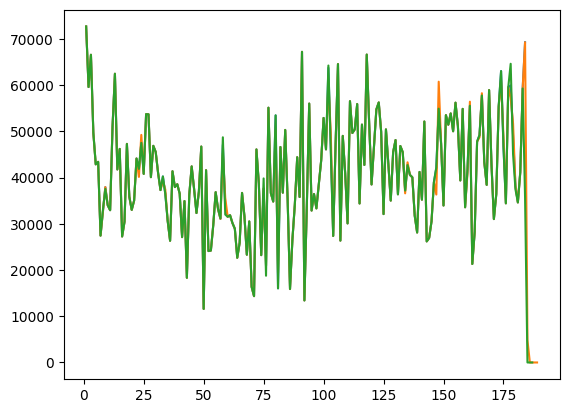

In [6]:
import re
from datetime import datetime
from zoneinfo import ZoneInfo

def extract_basescaler_timestamps_tps(filepath):
    """
    Parse a log file and extract timestamps + TPS values from lines like:
    2025/09/12 17:11:53.154578 basescaler.go:145: [Info] Current RPS over 1s: 25.00, TPS: 34507.00

    Returns:
        timestamps (list of float): epoch seconds in Singapore timezone
        tps_values (list of float): TPS numbers
    """
    # Regex: timestamp + must contain basescaler.go:145 + extract TPS
    pattern = re.compile(
        r"^(\d{4}/\d{2}/\d{2} \d{2}:\d{2}:\d{2}\.\d+).*basescaler\.go:146.*TPS:\s*([\d\.]+)"
    )
    sg_tz = ZoneInfo("Asia/Singapore")

    timestamps, tps_values = [], []

    with open(filepath, "r", encoding="utf-8") as f:
        for line in f:
            match = pattern.match(line.strip())
            if match:
                ts_str = match.group(1)
                tps = float(match.group(2))

                dt = datetime.strptime(ts_str, "%Y/%m/%d %H:%M:%S.%f")
                dt = dt.replace(tzinfo=sg_tz)

                timestamps.append(dt.timestamp())
                tps_values.append(tps)

    return timestamps, tps_values


for j, run_log_dir in enumerate(run_log_dirs):
    timestamps, tps_values = extract_basescaler_timestamps_tps(f"{run_log_dir}/router.err")
    timestamps = [t - first_request_arrival_times[j] for t in timestamps]
     # filter out negatives
    filtered = [(ts, tps) for ts, tps in zip(timestamps, tps_values) if ts >= 0]
    if not filtered:
        continue  # skip if nothing left

    timestamps, tps_values = zip(*filtered)
    plt.plot(timestamps, tps_values, label=run_log_dir)